train 97 , test 65

# **imports and functions**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import pandas as pd
from skimage import color
from skimage import io
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from skimage.transform import rescale, resize, downscale_local_mean 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import accuracy_score
import math

import numpy as np 
from sklearn import datasets, metrics, model_selection, svm
from PIL import Image

from sklearn.neural_network import MLPClassifier
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D , BatchNormalization , Dropout
from skimage.color import gray2rgb
from keras.preprocessing import image

from sklearn.preprocessing import MinMaxScaler



In [11]:
def drawing_conf_matrix(  y_actual , y_predict ):
    
    print( "Classification Report" )
    print ( classification_report(  y_actual , y_predict  )  )  # to represent accuacy, precision, recall and f1 score

    conf_mat = confusion_matrix( y_actual,   y_predict )   # to represent confusion matrix ( TP , FP , FN , FN )
  
    print( "Confusion Matrix")
    print( conf_mat )
    
    sns.heatmap( conf_mat , annot= True  , fmt = "" )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def readData(path):
    dataset =[]
    for imagge in glob.glob(path):

        myImage = tf.keras.utils.load_img(imagge, target_size=(128,128))
        # convert the image pixels to a numpy array
        image = tf.keras.utils.img_to_array(myImage)
        
        
        image = image.reshape((  image.shape[0], image.shape[1], image.shape[2] ))

        from keras.applications.vgg16 import preprocess_input
        # prepare the image for the VGG model
        image = preprocess_input(image)

        dataset.append(image)
        
        
    return dataset

# **Read Training Data**

In [12]:
trainingDataSet = []
trainingLabels = []
data1 = readData('/content/drive/MyDrive/Currency/AUG Train/1/*.*')
data2=readData('/content/drive/MyDrive/Currency/AUG Train/2/*.*')
data3=readData('/content/drive/MyDrive/Currency/AUG Train/3/*.*')
data4=readData('/content/drive/MyDrive/Currency/AUG Train/4/*.*')
data5=readData('/content/drive/MyDrive/Currency/AUG Train/5/*.*')
data6=readData('/content/drive/MyDrive/Currency/AUG Train/6/*.*')
data7=readData('/content/drive/MyDrive/Currency/AUG Train/7/*.*')

#Training Data  



allData =[data1,data2,data3,data4,data5 , data6 ,data7]

number = 0 
for i in allData:
  for pics in i : 

    trainingDataSet.append(pics)
    trainingLabels.append(number)

  number+=1



print("{}{}".format("Length of training data is : ",len(trainingDataSet)))
print("{}{}".format("Length of labeltraining data is : ",len(trainingLabels)))


Length of training data is : 7719
Length of labeltraining data is : 7719


In [13]:
for i in allData :
  print(len(i))

1110
1112
1059
1110
1109
1109
1110


# **Read Testing Data**

In [14]:
testingDataSet = []
testingLabels = []

data1 = readData('/content/drive/MyDrive/Currency/AUG Test/1/*.*')
data2=readData('/content/drive/MyDrive/Currency/AUG Test/2/*.*')
data3=readData('/content/drive/MyDrive/Currency/AUG Test/3/*.*')
data4=readData('/content/drive/MyDrive/Currency/AUG Test/4/*.*')
data5=readData('/content/drive/MyDrive/Currency/AUG Test/5/*.*')
data6=readData('/content/drive/MyDrive/Currency/AUG Test/6/*.*')
data7=readData('/content/drive/MyDrive/Currency/AUG Test/7/*.*')



allData =[data1,data2,data3,data4,data5 , data6 ,data7]

number = 0 
for i in allData:
  nums=0
  for pics in i : 
    nums+=1
    testingDataSet.append(pics)
    testingLabels.append(number)
    if nums == 20 :
      break

  number+=1



print("{}{}".format("Length of testing data is : ",len(testingDataSet)))
print("{}{}".format("Length of labeltesting data is : ",len(testingLabels)))


Length of testing data is : 140
Length of labeltesting data is : 140


In [15]:
for i in allData:
  print(len(i))


126
125
126
126
125
126
126


# **Training Model**

In [16]:
nClasses = 7
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(trainingLabels, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(testingLabels, num_classes=nClasses)


In [17]:
from tensorflow.keras.applications import VGG16


#from keras.layers.normalization import BatchNormalization


vgg_model2 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3) )
 
    




for layer in vgg_model2.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model2.layers[-1].output
x= Conv2D( 64 , ( 5 , 5), padding="same", activation="relu")(x)   # Adding a convolution layer with 32 filter of size 3*3

x=BatchNormalization( )(x)
x = Dropout(.6, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)
x = Dropout(.4, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)

# Flatten as before
x=BatchNormalization( )(x)
x = Dropout(.5, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)
x = Flatten()(x)
x = Dense(7, activation='softmax')(x)
vgg_model_transfer = Model(inputs=vgg_model2.input, outputs=x )






nEpochs = 15

trainingDataSet = np.array(trainingDataSet)
testingDataSet = np.array(testingDataSet)

#sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0002)

vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
es2 = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=200)


history = vgg_model_transfer.fit(trainingDataSet, y_train_k, epochs=nEpochs, verbose=1,batch_size=150, 
                                 validation_data=(testingDataSet, y_test_k) , callbacks=[es, mc,es2])

Epoch 1/15
52/52 [==============================] - ETA: 0s - loss: 1.2068 - accuracy: 0.5752
Epoch 1: val_accuracy improved from -inf to 0.70714, saving model to best_model.h5
52/52 [==============================] - 36s 449ms/step - loss: 1.2068 - accuracy: 0.5752 - val_loss: 1.5346 - val_accuracy: 0.7071
Epoch 2/15
52/52 [==============================] - ETA: 0s - loss: 0.3638 - accuracy: 0.8856
Epoch 2: val_accuracy improved from 0.70714 to 0.80714, saving model to best_model.h5
52/52 [==============================] - 13s 252ms/step - loss: 0.3638 - accuracy: 0.8856 - val_loss: 0.7379 - val_accuracy: 0.8071
Epoch 3/15
52/52 [==============================] - ETA: 0s - loss: 0.1736 - accuracy: 0.9526
Epoch 3: val_accuracy did not improve from 0.80714
52/52 [==============================] - 13s 255ms/step - loss: 0.1736 - accuracy: 0.9526 - val_loss: 0.6797 - val_accuracy: 0.8000
Epoch 4/15
52/52 [==============================] - ETA: 0s - loss: 0.1115 - accuracy: 0.9710
Epoch 4:

In [18]:
testingPrediction =  vgg_model_transfer.predict(testingDataSet)
trainingPrediction = vgg_model_transfer.predict(trainingDataSet)

242/242 [==============================] - 11s 45ms/step


In [19]:

testingPrediction = testingPrediction.argmax(axis=-1)
trainingPrediction = trainingPrediction.argmax(axis = -1 )

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1110
           1       1.00      1.00      1.00      1112
           2       1.00      1.00      1.00      1059
           3       1.00      1.00      1.00      1110
           4       1.00      1.00      1.00      1109
           5       1.00      1.00      1.00      1109
           6       1.00      1.00      1.00      1110

    accuracy                           1.00      7719
   macro avg       1.00      1.00      1.00      7719
weighted avg       1.00      1.00      1.00      7719

Confusion Matrix
[[1110    0    0    0    0    0    0]
 [   0 1112    0    0    0    0    0]
 [   0    0 1059    0    0    0    0]
 [   0    0    0 1110    0    0    0]
 [   0    0    0    0 1109    0    0]
 [   0    0    0    0    0 1109    0]
 [   0    0    0    0    0    0 1110]]


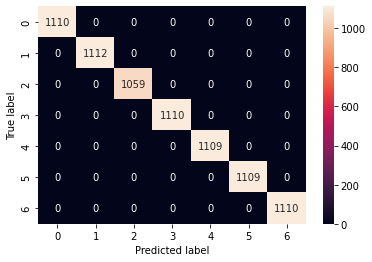

In [20]:
drawing_conf_matrix(   trainingLabels, trainingPrediction  )

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        20
           1       0.77      1.00      0.87        20
           2       0.94      0.85      0.89        20
           3       1.00      0.70      0.82        20
           4       0.76      0.95      0.84        20
           5       0.94      0.75      0.83        20
           6       0.94      0.80      0.86        20

    accuracy                           0.85       140
   macro avg       0.87      0.85      0.85       140
weighted avg       0.87      0.85      0.85       140

Confusion Matrix
[[18  0  0  0  2  0  0]
 [ 0 20  0  0  0  0  0]
 [ 1  0 17  0  1  0  1]
 [ 3  1  0 14  1  1  0]
 [ 1  0  0  0 19  0  0]
 [ 1  2  0  0  2 15  0]
 [ 0  3  1  0  0  0 16]]


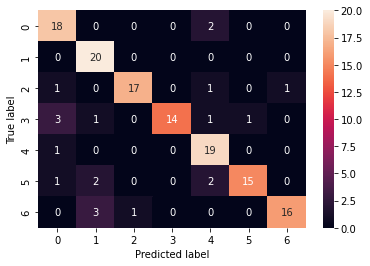

In [21]:
drawing_conf_matrix(   testingLabels, testingPrediction  )

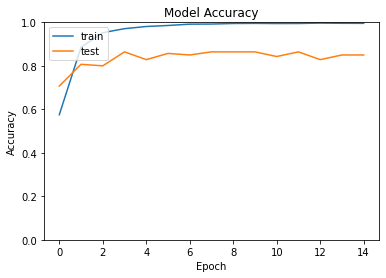

In [22]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim([0, 1]) 

    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


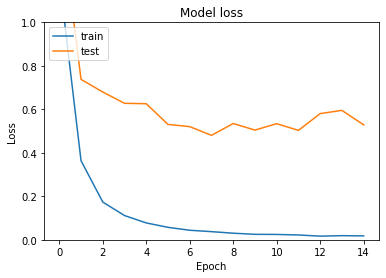

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1]) 

plt.legend(['train', 'test'], loc='upper left')
plt.show()



***Model with original data***

# read Original data

In [24]:
trainingDataSet = []
trainingLabels = []
 
path1Hundrednote = "/content/drive/MyDrive/Currency/Train/1Hundrednote/*.*"
path2Hundrednote = "/content/drive/MyDrive/Currency/Train/2Hundrednote/*.*"
path2Thousandnote = "/content/drive/MyDrive/Currency/Train/2Thousandnote/*.*"
path5Hundrednote = "/content/drive/MyDrive/Currency/Train/5Hundrednote/*.*"
pathFiftynote = "/content/drive/MyDrive/Currency/Train/Fiftynote/*.*"
pathTennote = "/content/drive/MyDrive/Currency/Train/Tennote/*.*"
pathTwentynote = "/content/drive/MyDrive/Currency/Train/Twentynote/*.*"


#Training Data  
trainingdata1 = readData(path1Hundrednote)
trainingdata2 = readData(path2Hundrednote)
trainingdata3 = readData(path2Thousandnote)
trainingdata4 = readData(path5Hundrednote)
trainingdata5 = readData(pathFiftynote)
trainingdata6 = readData(pathTennote)
trainingdata7 = readData(pathTwentynote)




allData =[trainingdata1,trainingdata2,trainingdata3,trainingdata4,trainingdata5 ,trainingdata6 , trainingdata7 ]

number = 0 
for i in allData:
  for pics in i : 

    trainingDataSet.append(pics)
    trainingLabels.append(number)

  number+=1

print("{}{}".format("Length of training data is : ",len(trainingDataSet)))
print("{}{}".format("Length of labeltraining data is : ",len(trainingLabels)))



Length of training data is : 153
Length of labeltraining data is : 153


In [25]:
testingDataSet = []
testingLabels = []


path1Hundrednote = "/content/drive/MyDrive/Currency/Test/1Hundrednote/*.*"
path2Hundrednote = "/content/drive/MyDrive/Currency/Test/2Hundrednote/*.*"
path2Thousandnote = "/content/drive/MyDrive/Currency/Test/2Thousandnote/*.*"
path5Hundrednote = "/content/drive/MyDrive/Currency/Test/5Hundrednote/*.*"
pathFiftynote = "/content/drive/MyDrive/Currency/Test/Fiftynote/*.*"
pathTennote = "/content/drive/MyDrive/Currency/Test/Tennote/*.*"
pathTwentynote = "/content/drive/MyDrive/Currency/Test/Twentynote/*.*"



#Training Data  
trainingdata1 = readData(path1Hundrednote)
trainingdata2 = readData(path2Hundrednote)
trainingdata3 = readData(path2Thousandnote)
trainingdata4 = readData(path5Hundrednote)
trainingdata5 = readData(pathFiftynote)
trainingdata6 = readData(pathTennote)
trainingdata7 = readData(pathTwentynote)




allData =[trainingdata1,trainingdata2,trainingdata3,trainingdata4,trainingdata5 ,trainingdata6 , trainingdata7 ]

number = 0 
for i in allData:
  for pics in i : 

    testingDataSet.append(pics)
    testingLabels.append(number)

  number+=1

print("{}{}".format("Length of training data is : ",len(testingDataSet)))
print("{}{}".format("Length of labeltraining data is : ",len(testingLabels)))



/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Length of training data is : 42
Length of labeltraining data is : 42


In [26]:
nClasses = 7
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(trainingLabels, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(testingLabels, num_classes=nClasses)


In [27]:
from tensorflow.keras.applications import VGG16


#from keras.layers.normalization import BatchNormalization


vgg_model2 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3) )
 
    




for layer in vgg_model2.layers:
    layer.trainable = False

# We will have to use the functional API    

# last layers output
x = vgg_model2.layers[-1].output
x= Conv2D( 64 , ( 5 , 5), padding="same", activation="relu")(x)   # Adding a convolution layer with 32 filter of size 3*3

x=BatchNormalization( )(x)
x = Dropout(.6, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)
x = Dropout(.4, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)

# Flatten as before
x = Flatten()(x)
x=BatchNormalization( )(x)
x = Dropout(.5, noise_shape=None, seed=None)(x)
x=BatchNormalization( )(x)
x = Dropout(.3, noise_shape=None, seed=None)(x)

x = Dense(7, activation='softmax')(x)
vgg_model_transfer = Model(inputs=vgg_model2.input, outputs=x )






nEpochs = 30

trainingDataSet = np.array(trainingDataSet)
testingDataSet = np.array(testingDataSet)

sgd = tensorflow.keras.optimizers.SGD(learning_rate=0.0002)

vgg_model_transfer.compile(loss='categorical_crossentropy', 
                           optimizer='adam', 
                           metrics=['accuracy'])





history = vgg_model_transfer.fit(trainingDataSet, y_train_k, epochs=nEpochs, verbose=1,batch_size=100, 
                                 validation_data=(testingDataSet, y_test_k) )

Epoch 1/30
2/2 [==============================] - 11s 6s/step - loss: 2.7210 - accuracy: 0.1634 - val_loss: 6.3201 - val_accuracy: 0.2857
Epoch 2/30
2/2 [==============================] - 0s 177ms/step - loss: 2.2780 - accuracy: 0.2418 - val_loss: 4.3307 - val_accuracy: 0.4524
Epoch 3/30
2/2 [==============================] - 0s 177ms/step - loss: 2.0016 - accuracy: 0.3529 - val_loss: 3.6083 - val_accuracy: 0.4762
Epoch 4/30
2/2 [==============================] - 0s 173ms/step - loss: 1.5723 - accuracy: 0.4444 - val_loss: 2.9915 - val_accuracy: 0.5000
Epoch 5/30
2/2 [==============================] - 0s 168ms/step - loss: 1.3985 - accuracy: 0.4967 - val_loss: 2.5214 - val_accuracy: 0.5238
Epoch 6/30
2/2 [==============================] - 0s 168ms/step - loss: 1.4145 - accuracy: 0.4902 - val_loss: 2.2192 - val_accuracy: 0.5476
Epoch 7/30
2/2 [==============================] - 0s 172ms/step - loss: 1.2361 - accuracy: 0.5882 - val_loss: 1.9756 - val_accuracy: 0.5714
Epoch 8/30
2/2 [======

In [28]:
testingPrediction =  vgg_model_transfer.predict(testingDataSet)
trainingPrediction = vgg_model_transfer.predict(trainingDataSet)

5/5 [==============================] - 2s 599ms/step


In [29]:


testingPrediction = testingPrediction.argmax(axis=-1)
trainingPrediction = trainingPrediction.argmax(axis = -1 )

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        22

    accuracy                           1.00       153
   macro avg       1.00      1.00      1.00       153
weighted avg       1.00      1.00      1.00       153

Confusion Matrix
[[22  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0]
 [ 0  0 21  0  0  0  0]
 [ 0  0  0 22  0  0  0]
 [ 0  0  0  0 22  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0 22]]


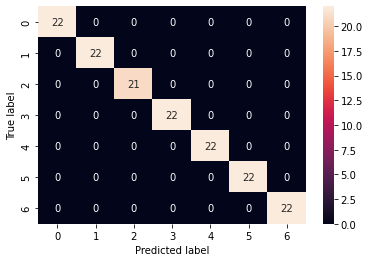

In [30]:
drawing_conf_matrix(   trainingLabels, trainingPrediction  )

Classification Report
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.75      1.00      0.86         6
           2       1.00      0.50      0.67         6
           3       1.00      0.83      0.91         6
           4       0.57      0.67      0.62         6
           5       1.00      0.67      0.80         6
           6       0.50      0.67      0.57         6

    accuracy                           0.69        42
   macro avg       0.75      0.69      0.70        42
weighted avg       0.75      0.69      0.70        42

Confusion Matrix
[[3 0 0 0 1 0 2]
 [0 6 0 0 0 0 0]
 [0 1 3 0 1 0 1]
 [1 0 0 5 0 0 0]
 [1 0 0 0 4 0 1]
 [2 0 0 0 0 4 0]
 [0 1 0 0 1 0 4]]


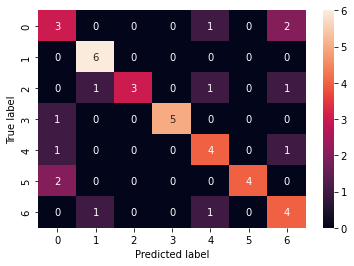

In [31]:
drawing_conf_matrix(   testingLabels, testingPrediction  )

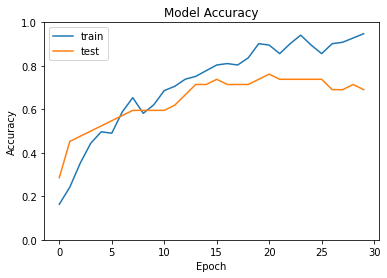

In [32]:
# dictionary keys seems to have changed in version 2
k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylim([0, 1]) 

    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


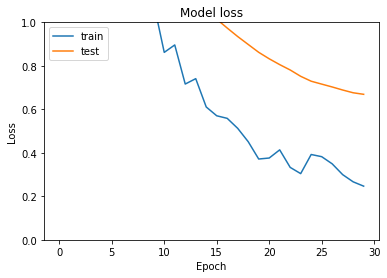

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim([0, 1]) 

plt.legend(['train', 'test'], loc='upper left')
plt.show()

